<IPython.core.display.Javascript object>


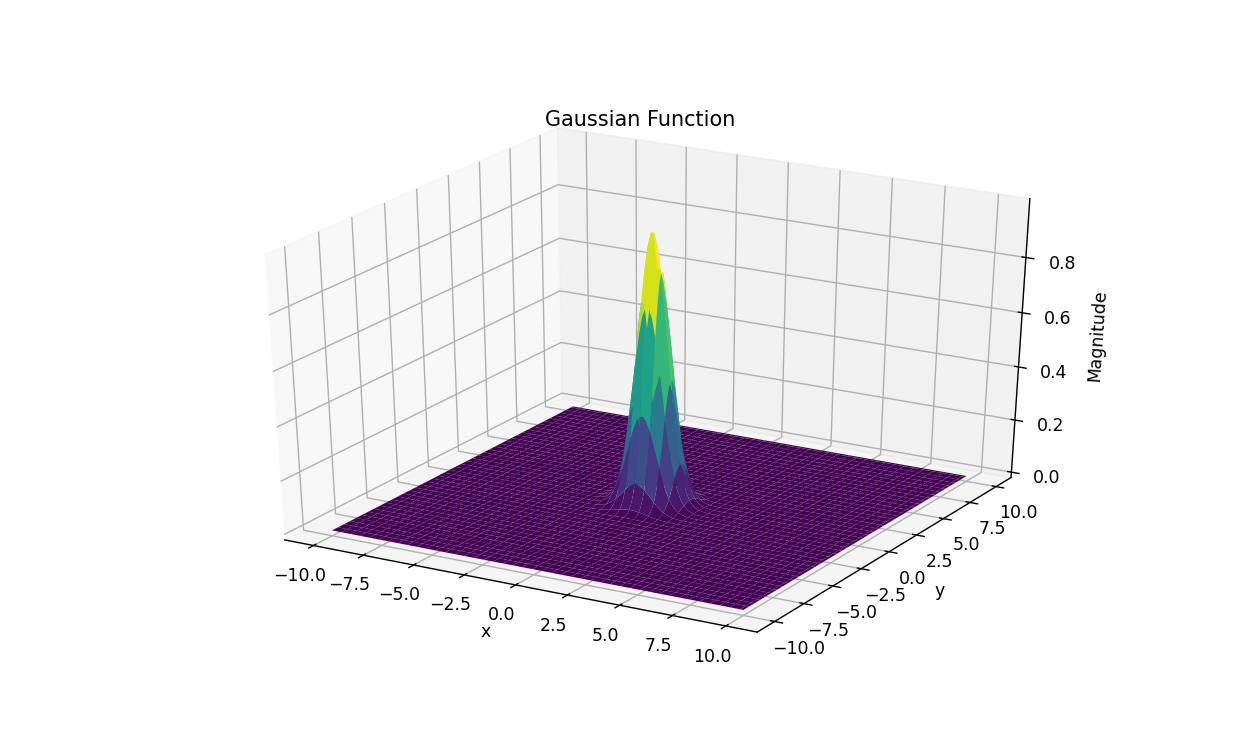

<IPython.core.display.Javascript object>


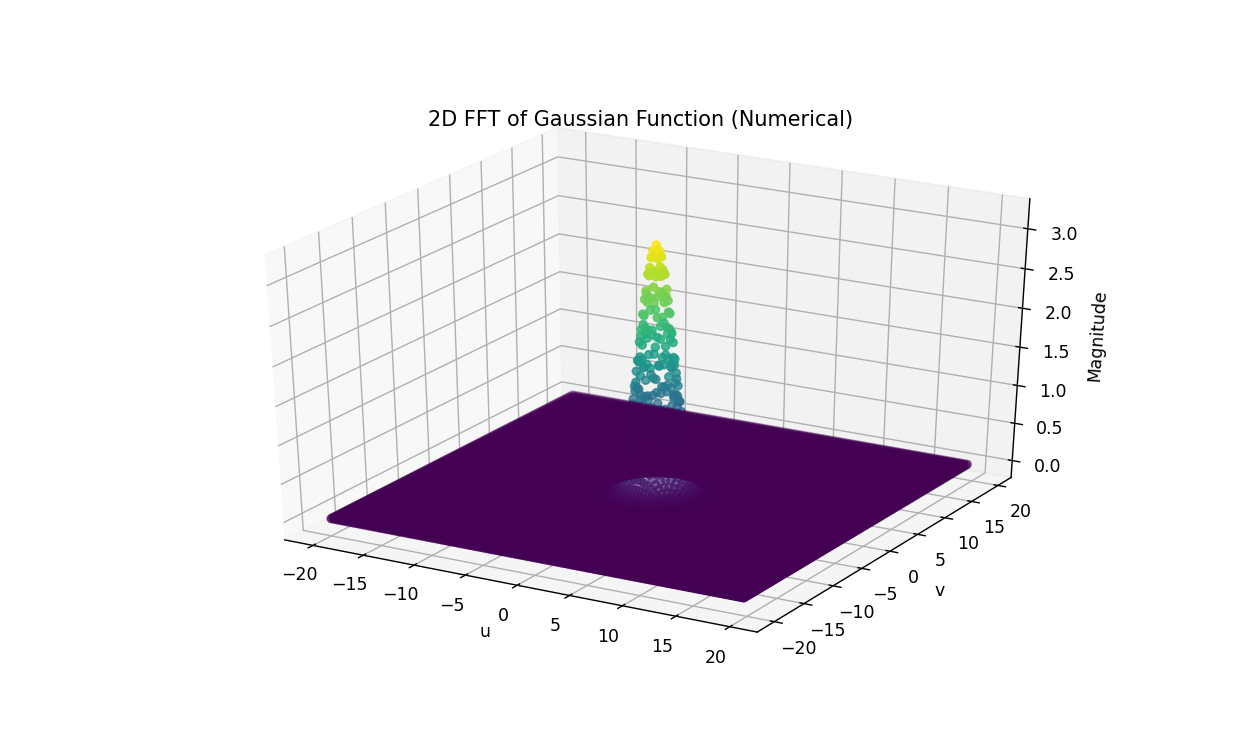

<IPython.core.display.Javascript object>


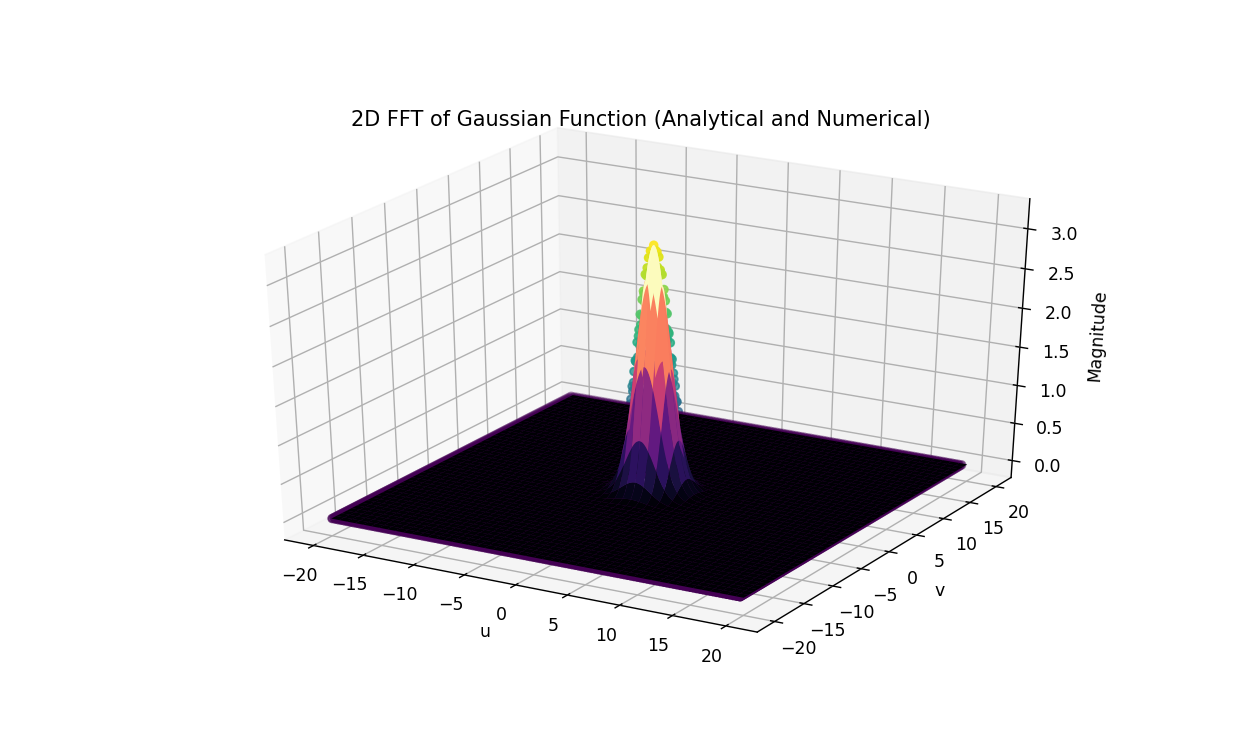

In [21]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid
N = 128
maxd = 10
x = np.linspace(-maxd, maxd, N)
y = np.linspace(-maxd, maxd, N)
X, Y = np.meshgrid(x, y)

# Define the Gaussian function
f = np.exp(-(X**2 + Y**2))

# Compute the 2D Fourier transform
F = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f), norm="ortho"))

# frquency space points
u = np.fft.fftshift(2*np.pi*np.fft.fftfreq(N, x[1] - x[0]))
v = np.fft.fftshift(2*np.pi*np.fft.fftfreq(N, y[1] - y[0]))
U, V = np.meshgrid(u, v)

# Calculate the prefactor
prefactor = N*np.abs((((x[1] - x[0]) * (y[1] - y[0]))) * np.exp((-1j) * ((u[:, np.newaxis] * x[0]) + (v[np.newaxis, :] * y[0]))))

# Multiply each element of F by the prefactor
for q in range(N):
    for r in range(N):
        F[q, r] *= prefactor[q, r]

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, np.abs(f), cmap='viridis', label='Original')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Magnitude')
ax.set_title('Gaussian Function')
plt.show()

# Create a finer grid for the analytical surface
N_analytical = 1000
u_analytical = np.linspace(-20, 20, N_analytical)
v_analytical = np.linspace(-20, 20, N_analytical)
U_analytical, V_analytical = np.meshgrid(u_analytical, v_analytical)

# Compute the analytical result on the finer grid
analytical_result_finer = np.pi * np.exp(-(U_analytical**2 + V_analytical**2) / 4)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(U.flatten(), V.flatten(), np.abs(F).flatten(), c=np.abs(F).flatten(), cmap='viridis', label='Numerical')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('Magnitude')
ax.set_title('2D FFT of Gaussian Function (Numerical)')

# Add interactive features
def on_mouse_move(event):
    if event.inaxes == ax:
        ax.view_init(elev=ax.elev, azim=ax.azim)
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

plt.show()

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U_analytical, V_analytical, analytical_result_finer, cmap='magma', label='Analytical')
ax.scatter(U.flatten(), V.flatten(), np.abs(F).flatten(), c=np.abs(F).flatten(), cmap='viridis', label='Numerical')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('Magnitude')
ax.set_title('2D FFT of Gaussian Function (Analytical and Numerical)')
plt.show()
